Задание 1.
Поработайте с датасетом про цены мобильных телефонов, обучите регрессию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Cellphone.csv')
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [3]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0] / data.shape[0]
print(f'{missing_values * 100} %')

Series([], dtype: float64) %


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [3]:
del data['Product_id'] # сразу удаляем столбец Product_id

<Axes: >

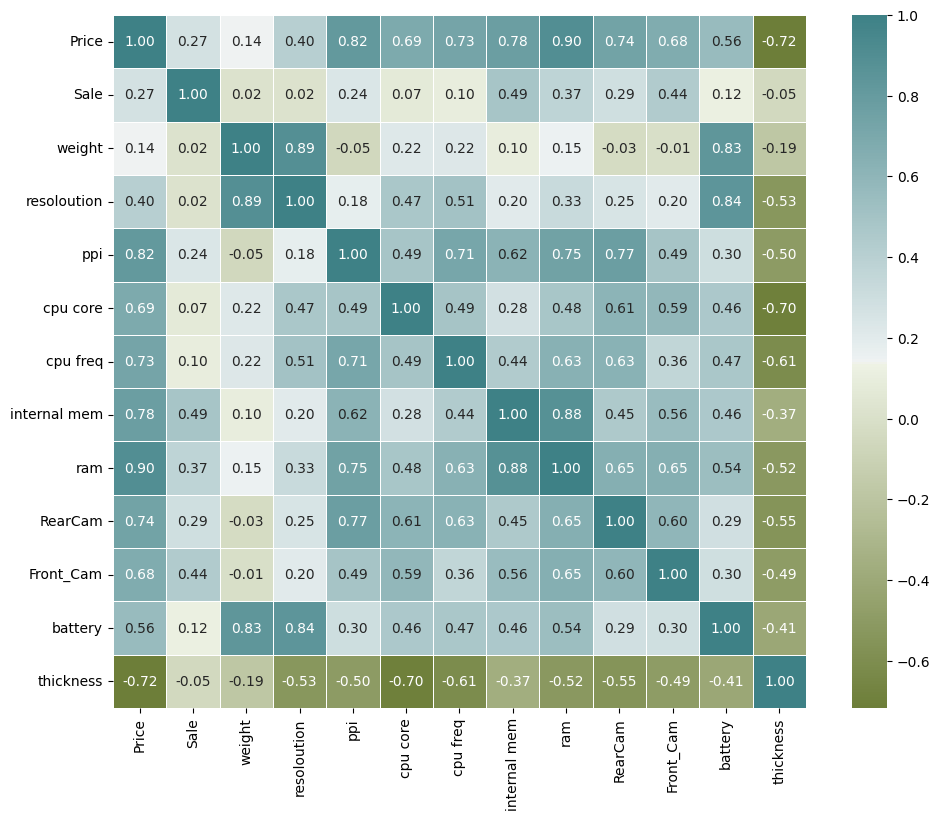

In [4]:
plt.pyplot.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [5]:
del data['weight'] # можно удалить weight, потому что слоабо коррелирует с таргетом и сильно с resoloution 

In [6]:
del data['Sale']

In [7]:
X = data.copy().drop('Price', axis=1)

y = data['Price']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=111)

scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)

In [8]:
print(mean_squared_error(ytrain,ypred_train) ** 0.5, mean_squared_error(ytest,ypred_test) ** 0.5)

158.6389094374801 207.29769459886688


In [9]:
r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test)

(0.9516154306617587, 0.947416493784146)

In [10]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,resoloution,-151.830597
1,ppi,173.995817
2,cpu core,117.824885
3,cpu freq,70.085202
4,internal mem,136.605179
5,ram,112.977465
6,RearCam,9.407286
7,Front_Cam,37.398229
8,battery,184.928829
9,thickness,-179.886609


In [11]:
regressor2 = Lasso(alpha=10) # добавить L1 регуляризацию
regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
print(regressor2.coef_,'\n')

Scores: 0.942635972592022 46879.075463544614
[ -22.76205617  187.478204    125.06018331   44.07748383  155.78494396
  147.04277367    4.02322197   21.95437395   62.19975856 -142.88588565] 



In [12]:
for a in np.arange(0.1,100.1,25):
    regressor2 = Lasso(alpha=a)
    regressor2.fit(Xtrain, ytrain)

    ypred2 = regressor2.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
    print(regressor2.coef_,'\n')

alpha=0.1
Scores: 0.9473976220725995 42987.75654091447
[-150.56178664  174.16692471  117.92052165   69.84074496  136.82807763
  113.25940213    9.3235004    37.2421891   183.71676778 -179.51528089] 

alpha=25.1
Scores: 0.9390692545035313 49793.87161686165
[  -0.          182.50694749  125.73926717   36.53607438  146.71785598
  172.56950859    0.           11.54963518   30.36836054 -132.33232444] 

alpha=50.1
Scores: 0.9324131906863281 55233.345309279626
[   0.          167.01990079  121.356609     30.4924351   124.43037601
  205.18062556    0.            0.           12.981673   -124.68272282] 

alpha=75.1
Scores: 0.9216250183855456 64049.66393707125
[   0.          154.26274588  111.21890819   24.58827987   99.30741805
  231.51948677    0.            0.            0.         -116.57387555] 



In [14]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        8.30854271,  8.35829146,  8.4080402 ,  8.45778894,  8.50753769,
        8.55728643,  8.60703518,  8.65678392,  8.70653266,  8.75628141,
        8.80603015,  8.85577889,  8.90552764,  8.95527638,  9.00502513,
        9.05477387,  9.10452261,  9.15427136,  9.2040201 ,  9.25376884,
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        cv=3, random_state=17)

In [15]:
lasso_cv.coef_

array([-1.02791697e+02,  1.04462076e+00,  5.63782602e+01,  1.41651507e+02,
        5.40157111e+00,  1.00455381e+02,  3.61111607e+00,  6.36553318e+00,
        1.22385149e-01, -8.14803749e+01])

In [16]:
lasso_cv.alpha_

0.1

In [17]:
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred2_train), r2_score(ytest,ypred2_test))

Scores: 0.9516149450795974 0.9473976220725995


In [18]:
from sklearn.linear_model import Ridge # добавить L2 регуляризацию

for a in np.arange(0.1,10.1,2.5):
    regressor3 = Ridge(alpha=a)
    regressor3.fit(Xtrain, ytrain)

    ypred3 = regressor3.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:',r2_score(ytest,ypred3), mean_squared_error(ytest,ypred3))
    print(regressor3.coef_)

alpha=0.1
Scores: 0.9474555519614872 42940.41503168874
[-150.21272762  173.77658979  117.93774979   70.00265181  136.94424487
  113.41862066    9.60471711   37.27755876  183.28378332 -179.25604757]
alpha=2.6
Scores: 0.9477941433001746 42663.71115236134
[-118.88064357  168.85257439  119.0813183    68.7577456   142.80933253
  121.41894538   14.40840958   35.79959987  152.04940477 -166.69137757]
alpha=5.1
Scores: 0.9475274905299138 42881.62533838453
[ -98.46709835  164.7398136   118.435655     68.41774775  145.59733694
  125.88054534   18.81615037   36.01000919  132.56392349 -157.9932142 ]
alpha=7.6
Scores: 0.9470303931945643 43287.86361260542
[ -83.8994455   161.19808378  117.05541431   68.48493721  146.81059885
  128.52760493   22.78165139   36.95852694  119.26226364 -151.40570542]


In [19]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5.80522552e-02,
       6.36824994e-02, 6.98587975e-0...
       1.18953407e+05, 1.30490198e+05, 1.43145894e+05, 1.57029012e+05,
       1.72258597e+05, 1.88965234e+05, 2.07292178e+05, 2.27396575e+05,
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06]),
        cv=3, scoring='neg_mean_squared_error')

In [20]:
ridge_cv.alpha_

2.833096101839324

In [21]:
regressor3 = Lasso(alpha=ridge_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

Scores: 0.9512121162503 0.9467534031226496


In [22]:
from sklearn.linear_model import ElasticNet # попробую одновременно добавить L1 и L2 регуляризацию (надеюсь я делаю это правильно)
regressor3 = ElasticNet(alpha=0.5, l1_ratio=0.5)
regressor3.fit(Xtrain, ytrain)
ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)
print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

Scores: 0.9417989315406128 0.9395775134540288


In [23]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor3.coef_))], axis = 1)
coefficients

,0,0
0,resoloution,-28.222428
1,ppi,140.292001
2,cpu core,101.731174
3,cpu freq,71.560967
4,internal mem,139.829550
5,ram,130.599130
6,RearCam,45.835811
7,Front_Cam,49.289249
8,battery,76.060751
9,thickness,-120.873306


Задание 2.
Поработайте с датасетом diet_data (Его создатель решил похудеть, подсчитывая калории, и ему это действительно удалось; в течение времени, пока худел, он записывал, что и какое он ест). Целевая колонка - change.

In [2]:
data = pd.read_csv('diet_data.csv')
data.head()

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0


In [4]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0] / data.shape[0]
print(f'{missing_values * 100} %') # есть пропуски

calories       7.284768
five_donuts    7.284768
walk           7.284768
run            7.284768
wine           7.284768
prot           7.284768
weight         7.284768
Stone          5.960265
Pounds         5.960265
Ounces         5.960265
cals_per_oz    2.649007
change         2.649007
weight_oz      1.324503
Date           0.662252
dtype: float64 %


In [3]:
# просто удаляю все строчки с пропусками, потому что это означает, что данные не были внесены
data = data.dropna(axis = 0, how ='any')
data 

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,12/15/2018,11.0,11.0,0.0,2640.0,5750.0,2.18,0.0,0.0,0.0,0.0,0.0,0.0,16.0
139,12/16/2018,11.0,12.0,0.0,2656.0,2950.0,1.11,0.0,1.0,1.0,0.0,0.0,0.0,0.0
140,12/17/2018,11.0,12.0,0.0,2656.0,1950.0,0.73,1.0,1.0,0.0,0.0,0.0,0.0,-24.0
141,12/18/2018,11.0,10.0,8.0,2632.0,1900.0,0.72,0.0,1.0,0.0,0.0,0.0,0.0,-4.0


In [4]:
del data['Date'] # сразу можно удалить с толбец с датой за ненадобностью

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 142
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Stone        140 non-null    float64
 1   Pounds       140 non-null    float64
 2   Ounces       140 non-null    float64
 3   weight_oz    140 non-null    float64
 4   calories     140 non-null    float64
 5   cals_per_oz  140 non-null    object 
 6   five_donuts  140 non-null    float64
 7   walk         140 non-null    float64
 8   run          140 non-null    float64
 9   wine         140 non-null    float64
 10  prot         140 non-null    float64
 11  weight       140 non-null    float64
 12  change       140 non-null    float64
dtypes: float64(12), object(1)
memory usage: 15.3+ KB


In [8]:
set(data.cals_per_oz)

{'0.51',
 '0.52',
 '0.55',
 '0.57',
 '0.58',
 '0.59',
 '0.63',
 '0.66',
 '0.67',
 '0.68',
 '0.70',
 '0.71',
 '0.72',
 '0.73',
 '0.74',
 '0.76',
 '0.78',
 '0.79',
 '0.80',
 '0.81',
 '0.82',
 '0.83',
 '0.84',
 '0.85',
 '0.86',
 '0.87',
 '0.88',
 '0.89',
 '0.90',
 '0.92',
 '0.93',
 '0.94',
 '0.95',
 '0.96',
 '0.97',
 '1.02',
 '1.05',
 '1.06',
 '1.08',
 '1.09',
 '1.11',
 '1.13',
 '1.14',
 '1.15',
 '1.16',
 '1.17',
 '1.18',
 '1.20',
 '1.22',
 '1.23',
 '1.26',
 '1.28',
 '1.31',
 '1.32',
 '1.34',
 '1.37',
 '1.40',
 '1.43',
 '1.51',
 '1.56',
 '1.57',
 '1.58',
 '1.60',
 '1.63',
 '1.70',
 '1.75',
 '1.78',
 '1.83',
 '1.88',
 '1.92',
 '1.93',
 '1.97',
 '1.99',
 '2.02',
 '2.03',
 '2.11',
 '2.17',
 '2.18',
 '2.19',
 '2.30',
 '2.37',
 '2.39',
 '2.61',
 '2.81',
 '3.45'}

In [5]:
# меняю тип столбца cals_per_oz с object на float64
data['cals_per_oz'] = data['cals_per_oz'].astype('float64')

<Axes: >

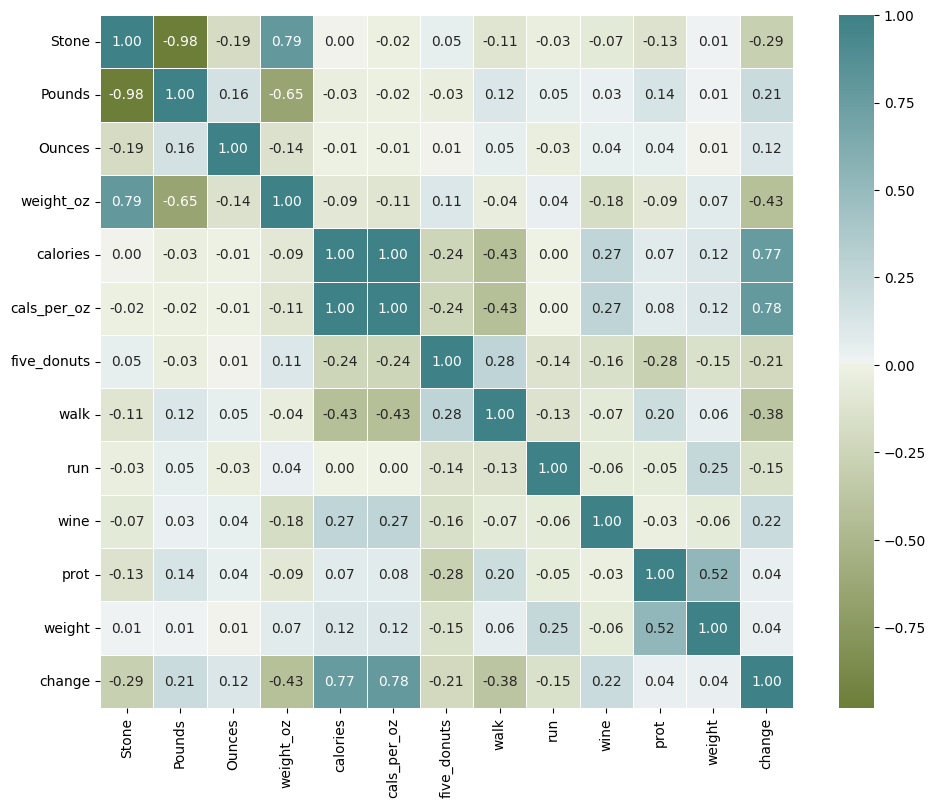

In [11]:
plt.pyplot.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [6]:
# удаляем столбцы Stone, Pounds и Ounces, потому что они используются только чтобы посчитать weight_oz
data.drop(['Stone', 'Pounds', 'Ounces'], axis=1, inplace=True)

In [7]:
del data['calories'] # удаляю, т.к. очевидно очень сильно коррелирует с cals_per_oz

In [8]:
data.drop(['prot', 'weight'], axis=1, inplace=True) # удаляю, т.к. слабо коррелируют с таргетом

In [9]:
X = data.copy().drop('change', axis=1)

y = data['change']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=111)

scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)

In [11]:
r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test)

(0.8040585934878461, 0.48695305325679306)

In [12]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,weight_oz,-9.035326
1,cals_per_oz,17.982691
2,five_donuts,-0.140579
3,walk,-3.815275
4,run,-4.491484
5,wine,-2.046979


In [13]:
regressor2 = Lasso(alpha=10) # добавить L1 регуляризацию
regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
print(regressor2.coef_,'\n')

Scores: 0.2287948154547239 406.3897197723967
[-0.         10.15387281 -0.         -0.         -0.          0.        ] 



In [14]:
for a in np.arange(0.1,100.1,25):
    regressor2 = Lasso(alpha=a)
    regressor2.fit(Xtrain, ytrain)

    ypred2 = regressor2.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
    print(regressor2.coef_,'\n')

alpha=0.1
Scores: 0.49084407070407765 268.3017951299528
[-8.91543617 17.90060535 -0.05880915 -3.73864151 -4.3695314  -1.87004786] 

alpha=25.1
Scores: -0.1771110686172941 620.2834821428571
[-0.  0. -0. -0. -0.  0.] 

alpha=50.1
Scores: -0.1771110686172941 620.2834821428571
[-0.  0. -0. -0. -0.  0.] 

alpha=75.1
Scores: -0.1771110686172941 620.2834821428571
[-0.  0. -0. -0. -0.  0.] 



In [20]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        8.30854271,  8.35829146,  8.4080402 ,  8.45778894,  8.50753769,
        8.55728643,  8.60703518,  8.65678392,  8.70653266,  8.75628141,
        8.80603015,  8.85577889,  8.90552764,  8.95527638,  9.00502513,
        9.05477387,  9.10452261,  9.15427136,  9.2040201 ,  9.25376884,
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        cv=3, random_state=17)

In [21]:
lasso_cv.coef_

array([-0.30930957, 31.37978817, -0.        , -5.2453021 , -7.44926114,
       -1.68251856])

In [22]:
lasso_cv.alpha_

0.2492462311557789

In [23]:
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred2_train), r2_score(ytest,ypred2_test))

Scores: 0.8034394462238891 0.4961661842263715


In [25]:
from sklearn.linear_model import Ridge # добавление L2 регуляризацию

for a in np.arange(0.1,10.1,2.5):
    regressor3 = Ridge(alpha=a)
    regressor3.fit(Xtrain, ytrain)

    ypred3 = regressor3.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:',r2_score(ytest,ypred3), mean_squared_error(ytest,ypred3))
    print(regressor3.coef_)

alpha=0.1
Scores: 0.48700167007973216 270.32656382221955
[-9.02766146 17.96378282 -0.14346123 -3.8169999  -4.4881751  -2.03863609]
alpha=2.6
Scores: 0.4878906547895455 269.8581097008743
[-8.840318   17.50641678 -0.21292553 -3.85525327 -4.40675743 -1.83900515]
alpha=5.1
Scores: 0.4882098113453083 269.68992885113533
[-8.66086992 17.07654066 -0.27764306 -3.88508935 -4.32782358 -1.65535009]
alpha=7.6
Scores: 0.4880348083171844 269.78214741110327
[-8.48885296 16.67148806 -0.33793417 -3.90774728 -4.25130748 -1.48606634]


In [26]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5.80522552e-02,
       6.36824994e-02, 6.98587975e-0...
       1.18953407e+05, 1.30490198e+05, 1.43145894e+05, 1.57029012e+05,
       1.72258597e+05, 1.88965234e+05, 2.07292178e+05, 2.27396575e+05,
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06]),
        cv=3, scoring='neg_mean_squared_error')

In [27]:
ridge_cv.alpha_

1.0234114021054528

In [28]:
ridge_cv.coef_

array([-0.313272  , 31.23454638, -0.19267082, -6.44516281, -8.71363303,
       -2.94434881])

In [29]:
regressor3 = Lasso(alpha=ridge_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

Scores: 0.7940398453880351 0.5143996313194747


In [30]:
from sklearn.linear_model import ElasticNet # теперь можно одновременно добавить L1 и L2 регуляризации

regressor3 = ElasticNet(alpha=0.5, l1_ratio=0.5)
regressor3.fit(Xtrain, ytrain)
ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)
print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

Scores: 0.7711774886792038 0.4764530053115231


In [31]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor3.coef_))], axis = 1)
coefficients

,0,0
0,weight_oz,-7.086607
1,cals_per_oz,13.893345
2,five_donuts,-0.532502
3,walk,-3.767306
4,run,-3.473982
5,wine,-0.175534


Задание 3.
Поработайте с датасетом Life Expectancy. Целевая колонка - Life Expectancy, собственно.

In [17]:
data = pd.read_csv('Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [18]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0] / data.shape[0]
print(f'{missing_values * 100} %')

Population                         22.191967
Hepatitis B                        18.822328
GDP                                15.248468
Total expenditure                   7.692308
Alcohol                             6.603131
Income composition of resources     5.684139
Schooling                           5.547992
 thinness 5-9 years                 1.157250
 thinness  1-19 years               1.157250
 BMI                                1.157250
Polio                               0.646698
Diphtheria                          0.646698
Life expectancy                     0.340368
Adult Mortality                     0.340368
dtype: float64 %


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [20]:
set(data.Country)

{'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala'

In [36]:
set(data.Status)

{'Developed', 'Developing'}

In [21]:
del data['Country'] # можно удалить название стрвны, потому что само название никак не влияет

In [22]:
def map_status(status):
    dct = {'Developing' : 0, 'Developed' : 1}
    return dct [status]
    
data['Status'] = data['Status'].apply(map_status)

In [23]:
# удаляю строки с пропусками, потому счто пропуски значат, скорей всего, то, что данные не предоставлены, а значит на 0 заменить нельзя. На среднее значение тоже вряд ли можно заменить, т.к. данные для развитых и равивающихся сран слишком сильно различаются
data = data.dropna()
data

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


<Axes: >

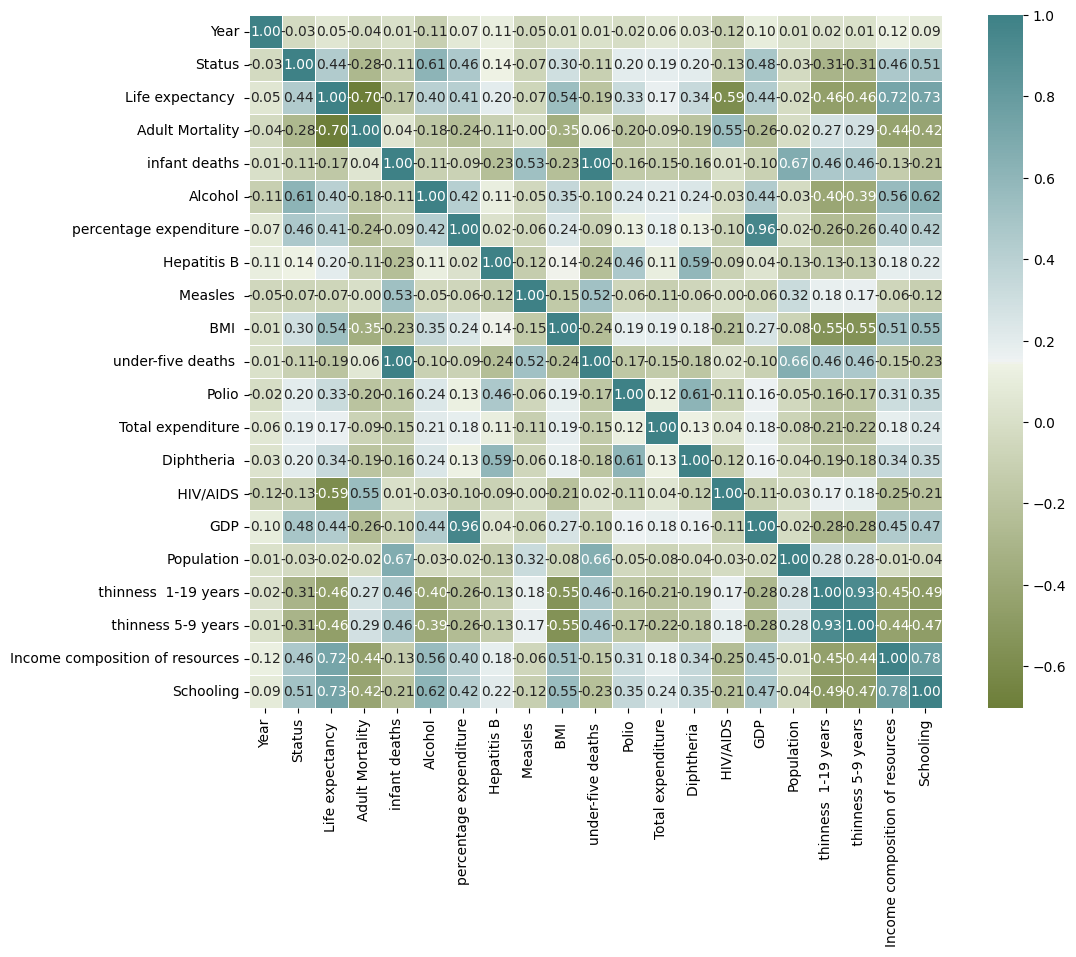

In [24]:

plt.pyplot.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [6]:
data.drop(['Year', 'Population'], axis=1, inplace=True) # удаляю, т.к. очень слабо коррелируют с таргетом

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           1649 non-null   int64  
 1   Life expectancy                  1649 non-null   float64
 2   Adult Mortality                  1649 non-null   float64
 3   infant deaths                    1649 non-null   int64  
 4   Alcohol                          1649 non-null   float64
 5   percentage expenditure           1649 non-null   float64
 6   Hepatitis B                      1649 non-null   float64
 7   Measles                          1649 non-null   int64  
 8    BMI                             1649 non-null   float64
 9   under-five deaths                1649 non-null   int64  
 10  Polio                            1649 non-null   float64
 11  Total expenditure                1649 non-null   float64
 12  Diphtheria               

In [13]:
# thinness  1-19 years и thinness 5-9 years сильно коррелируют друг с другом. Нужно удалить один из этих столбцов
del data['thinness 5-9 years'] # почему-то не удаляется((

KeyError: 'thinness 5-9 years'

In [12]:

del data['GDP'] #  потому что сильно коррелирует с percentage expenditure

In [8]:
del data['infant deaths'] # сильно коррелирует с under-five deaths (вообще хотела удалить under-five deaths, но оно почему-то не удалялось)

In [29]:
X = data.copy().drop('Life expectancy', axis=1)

y = data['Life expectancy']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=111)

scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)

# И тут все сломалось

KeyError: "['Life expectancy'] not found in axis"

In [27]:
print(mean_squared_error(ytrain,ypred_train) ** 0.5, mean_squared_error(ytest,ypred_test) ** 0.5)

NameError: name 'ytrain' is not defined

In [ ]:
r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test)